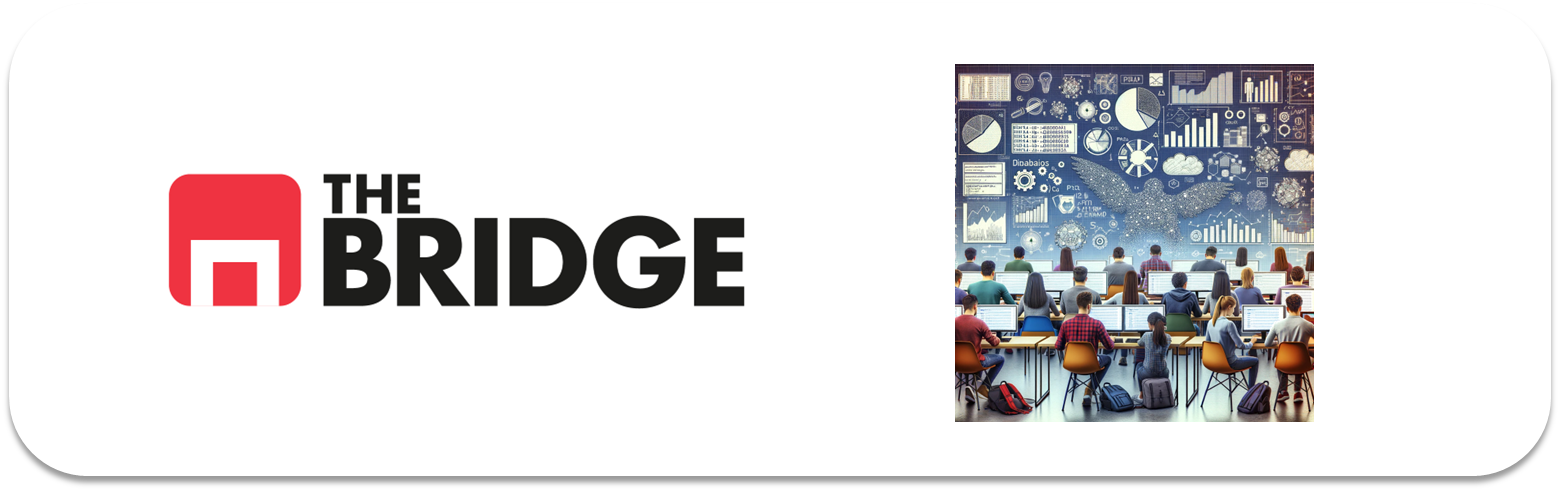

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [19]:
# 1. Carga el dataset del Titanic. 

df = pd.read_csv('./data/titanic.csv')

In [20]:
# 2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

df.drop(['class', 'alive','embark_town','adult_male'], axis=1, inplace=True)
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].replace({'C': 0, 'Q': 1,'S': 2})
df['deck'] = df['deck'].replace({'A': 0, 'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6})
df['who'] = df['who'].replace({'man': 0, 'woman': 1,'child': 2})
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    float64
 8   who       891 non-null    int64  
 9   deck      203 non-null    float64
 10  alone     891 non-null    bool   
dtypes: bool(1), float64(4), int64(6)
memory usage: 70.6 KB


C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\1425761839.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\1425761839.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['embarked'] = df['embarked'].replace({'C': 0, 'Q': 1,'S': 2})
C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\1425761839.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beh

In [21]:
df.deck.value_counts()

deck
2.0    59
1.0    47
3.0    33
4.0    32
0.0    15
5.0    13
6.0     4
Name: count, dtype: int64

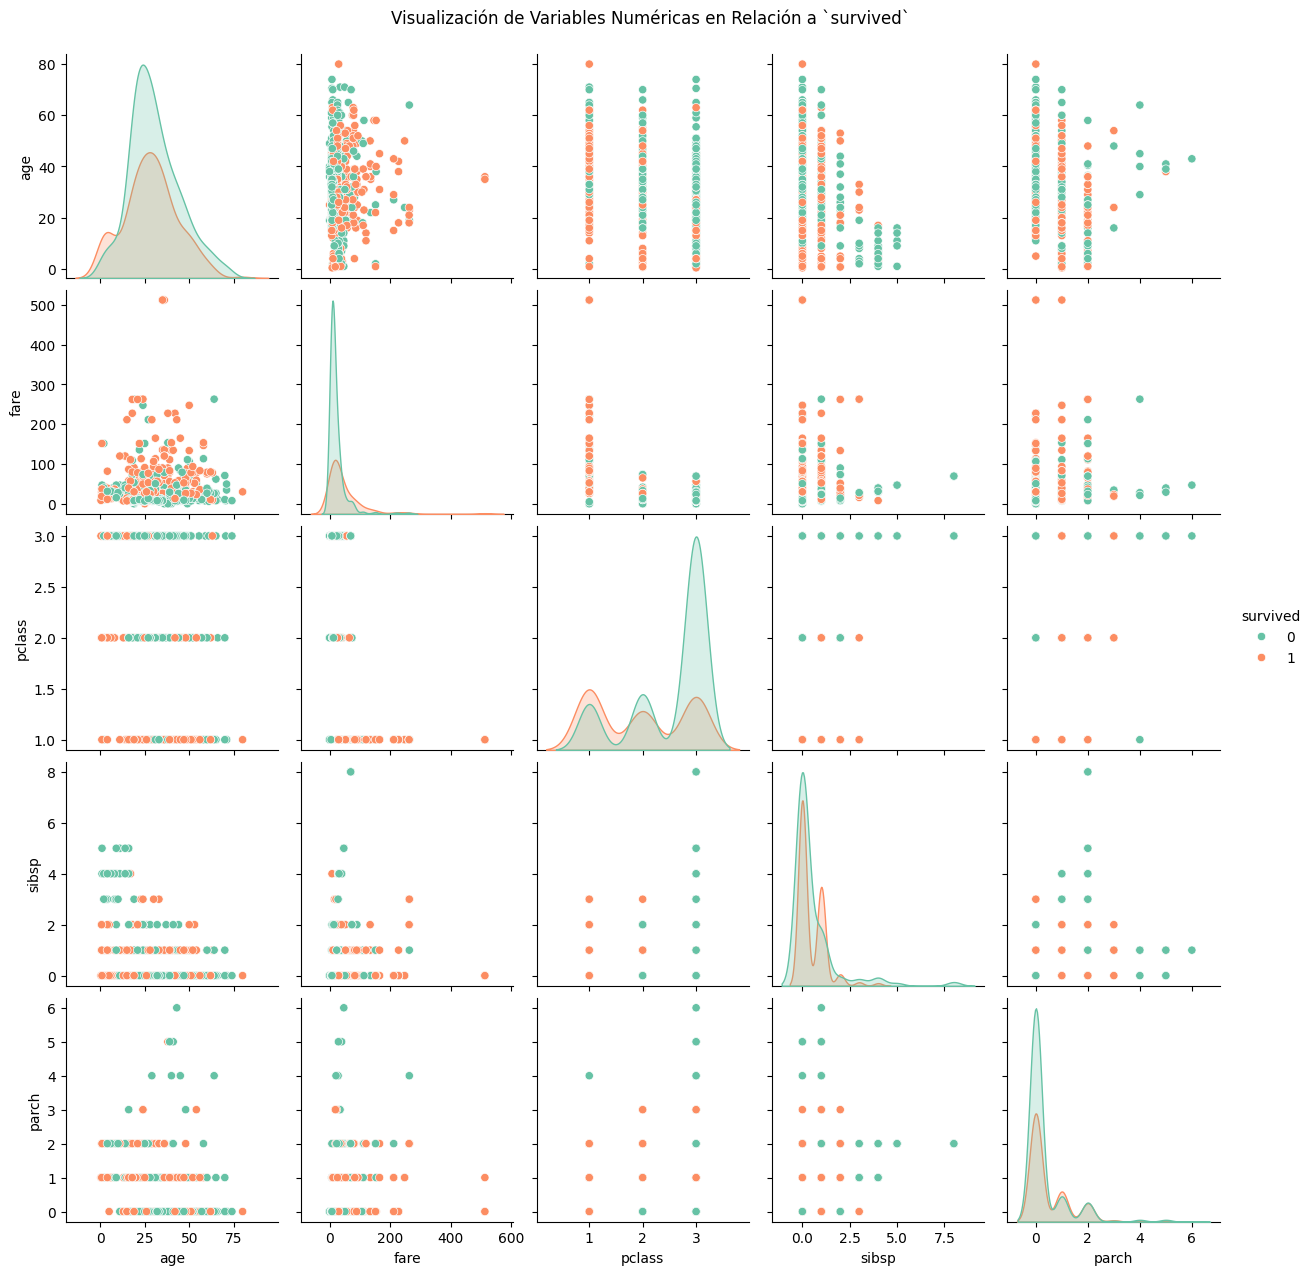

In [22]:
# 3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
# Crear el pairplot de nuevo, pero asegurándonos de que sólo incluya variables numéricas y no categóricas

sns.pairplot(df[['survived', 'age', 'fare','pclass','sibsp','parch']], hue='survived', palette='Set2', diag_kind='kde')

plt.suptitle('Visualización de Variables Numéricas en Relación a `survived`', y=1.02)

plt.show();

target = 'survived'

C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\132070547.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target, palette='Set2');


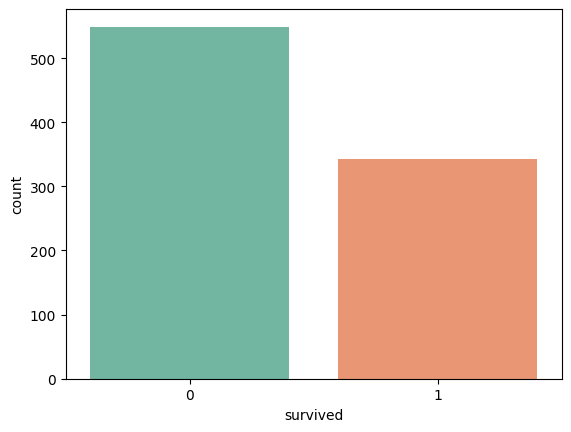

In [23]:
sns.countplot(data=df, x=target, palette='Set2');

In [24]:
# 4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
from sklearn.model_selection import train_test_split 

X = df.drop([target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) 

Distribución de 'embarked' en train:
embarked
2.0    0.739437
0.0    0.176056
1.0    0.084507
Name: proportion, dtype: float64

Distribución de 'embarked' en test:
embarked
2.0    0.664804
0.0    0.240223
1.0    0.094972
Name: proportion, dtype: float64


C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\2119441069.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train, x='embarked', palette='Set2', order=X_train['embarked'].value_counts().index)
C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\2119441069.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_test, x='embarked', palette='Set2', order=X_test['embarked'].value_counts().index)


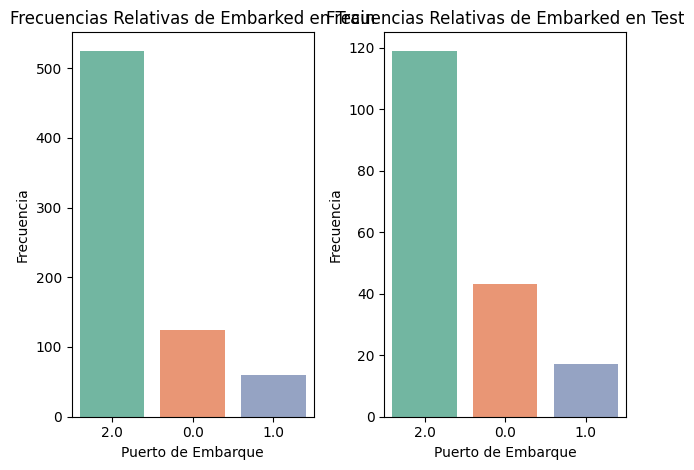

In [25]:

# Verificar la distribución de 'embarked' en ambos conjuntos
print("Distribución de 'embarked' en train:")
print(X_train['embarked'].value_counts(normalize=True))

print("\nDistribución de 'embarked' en test:")
print(X_test['embarked'].value_counts(normalize=True))

plt.subplot(1, 2, 1)
sns.countplot(data=X_train, x='embarked', palette='Set2', order=X_train['embarked'].value_counts().index)
plt.title('Frecuencias Relativas de Embarked en Train')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Frecuencia')

# Gráfico para el conjunto de prueba
plt.subplot(1, 2, 2)
sns.countplot(data=X_test, x='embarked', palette='Set2', order=X_test['embarked'].value_counts().index)
plt.title('Frecuencias Relativas de Embarked en Test')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show();

In [26]:
# 5. Construye las parejas X,y de train y test.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    int64  
 2   age       572 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  710 non-null    float64
 7   who       712 non-null    int64  
 8   deck      158 non-null    float64
 9   alone     712 non-null    bool   
dtypes: bool(1), float64(4), int64(5)
memory usage: 56.3 KB


In [27]:
# Impute the mean for the 'age' column
age_mean_values = X_train['age'].mean()
X_train['age'].fillna(age_mean_values, inplace=True)

# Impute the mode for the 'embarked' and 'deck' columns
embarked_mode_values = X_train['embarked'].mode()[0]
deck_mode_values = X_train['deck'].mode()[0]
X_train['embarked'].fillna(embarked_mode_values, inplace=True)
X_train['deck'].fillna(deck_mode_values, inplace=True)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  712 non-null    float64
 7   who       712 non-null    int64  
 8   deck      712 non-null    float64
 9   alone     712 non-null    bool   
dtypes: bool(1), float64(4), int64(5)
memory usage: 56.3 KB


C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\2232931458.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['age'].fillna(age_mean_values, inplace=True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\2232931458.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [28]:
# 7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
df_eda = X_train.copy()
df_eda["survived"] = y_train.copy()
corr = np.abs(df_eda.corr()['survived']).sort_values(ascending=False)
corr

survived    1.000000
sex         0.541750
who         0.464070
pclass      0.321750
fare        0.246641
alone       0.180542
embarked    0.155016
parch       0.078311
deck        0.073127
age         0.054226
sibsp       0.047602
Name: survived, dtype: float64

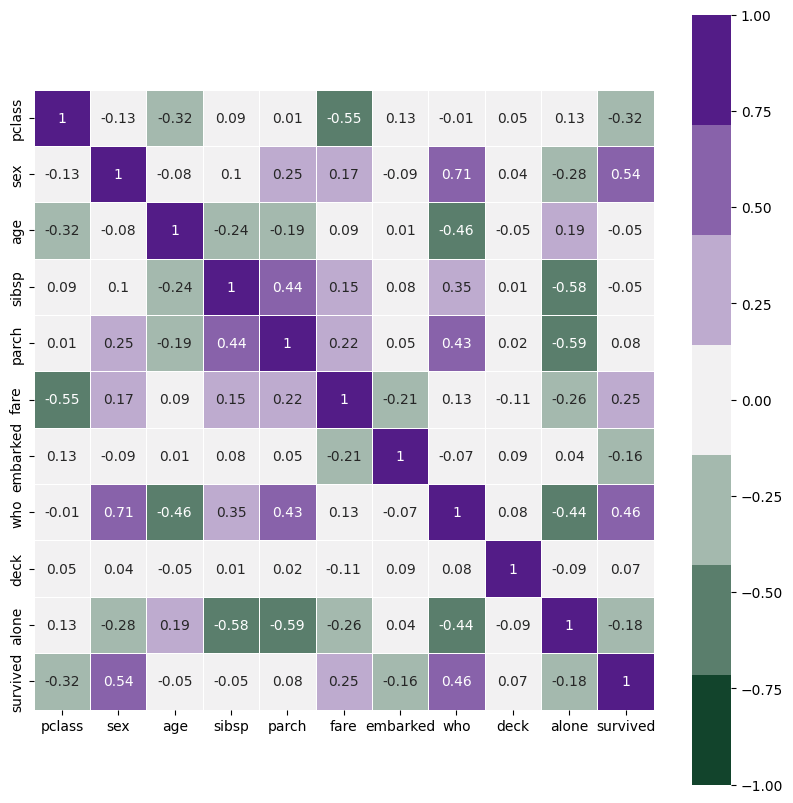

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df_eda.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

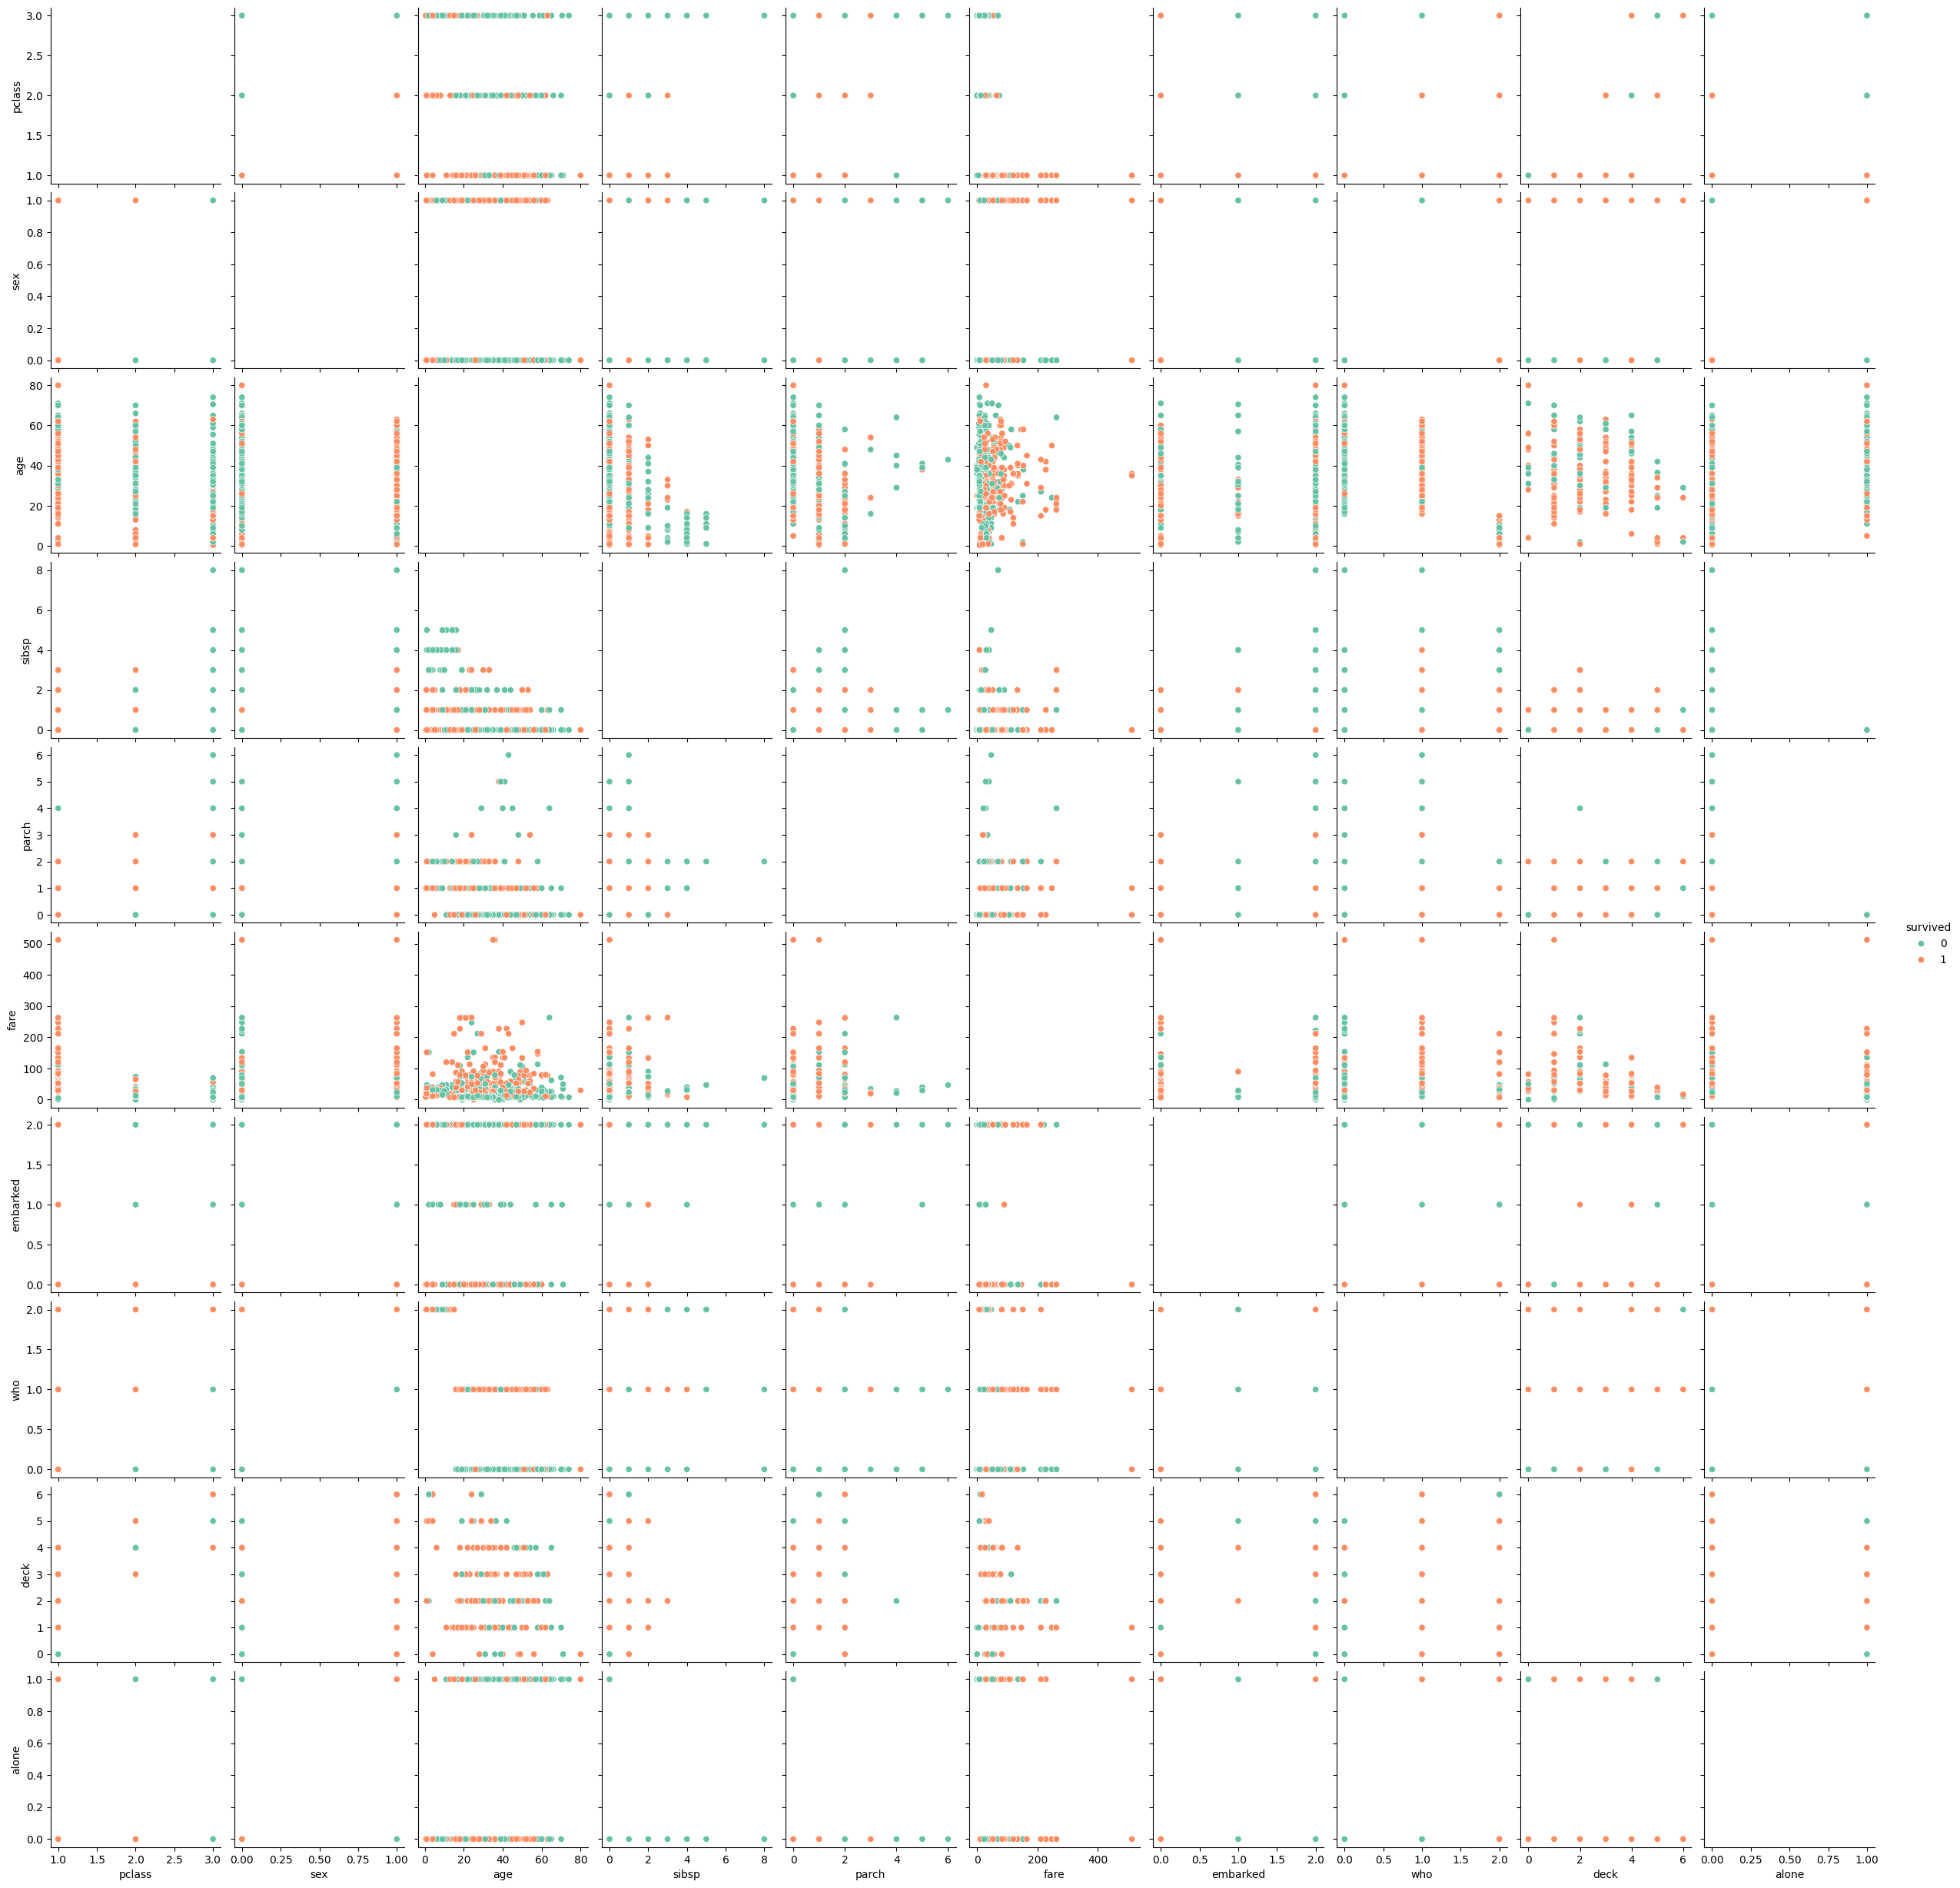

In [30]:
sns.pairplot(df, hue='survived', palette='Set2', diag_kind='reg')


array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'embarked'}>,
        <Axes: title={'center': 'who'}>,
        <Axes: title={'center': 'deck'}>]], dtype=object)

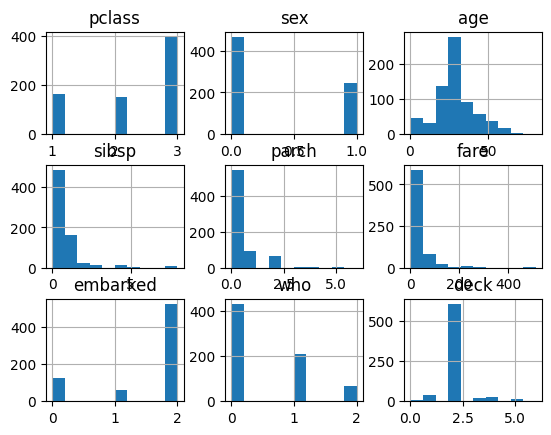

In [31]:
# 8. Trata las variables para que funcionen lo mejor posible en el modelo.
X_train.hist()


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    int64  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  712 non-null    float64
 7   who       712 non-null    int64  
 8   deck      712 non-null    float64
 9   alone     712 non-null    bool   
dtypes: bool(1), float64(4), int64(5)
memory usage: 56.3 KB


In [33]:
# 9. Construye un modelo de regresión logística.
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000) 

clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [39]:
print(clf.coef_)
print(clf.intercept_)
print(clf.classes_)

[[-0.81087623  1.46416129 -0.00274005 -0.59270072 -0.40596944  0.00415702
  -0.18968162  1.38952193  0.21603165 -0.48799458]]
[0.57012654]
[0 1]


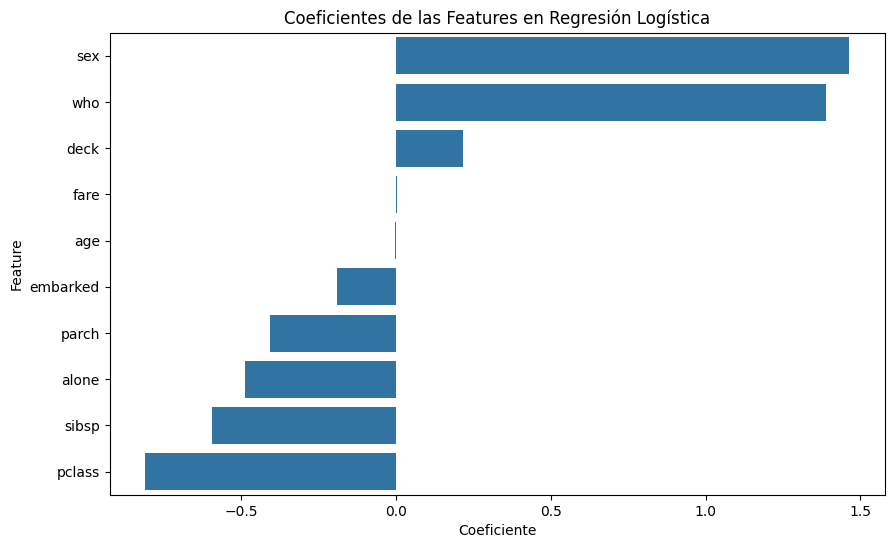

In [42]:
# 10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
# Obtener los coeficientes de las features
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': clf.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Visualizar los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coeficientes de las Features en Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Feature')
plt.show()

In [51]:
# 11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
# Impute the mean for the 'age' column
age_mean_values = X_test['age'].mean()
X_test['age'].fillna(age_mean_values, inplace=True)

# Impute the mode for the 'embarked' and 'deck' columns
embarked_mode_values = X_test['embarked'].mode()[0]
deck_mode_values = X_test['deck'].mode()[0]
X_test['embarked'].fillna(embarked_mode_values, inplace=True)
X_test['deck'].fillna(deck_mode_values, inplace=True)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 709 to 10
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    179 non-null    int64  
 1   sex       179 non-null    int64  
 2   age       179 non-null    float64
 3   sibsp     179 non-null    int64  
 4   parch     179 non-null    int64  
 5   fare      179 non-null    float64
 6   embarked  179 non-null    float64
 7   who       179 non-null    int64  
 8   deck      179 non-null    float64
 9   alone     179 non-null    bool   
dtypes: bool(1), float64(4), int64(5)
memory usage: 14.2 KB


C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\257248699.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['age'].fillna(age_mean_values, inplace=True)
C:\Users\rodri\AppData\Local\Temp\ipykernel_5532\257248699.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [43]:
# 12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
clf.predict(X_train)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,

In [44]:
clf.predict_proba(X_train)

array([[0.66423879, 0.33576121],
       [0.81696223, 0.18303777],
       [0.91313543, 0.08686457],
       ...,
       [0.95473489, 0.04526511],
       [0.05240296, 0.94759704],
       [0.52852962, 0.47147038]])

In [45]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_train, clf.predict(X_train))
print(acc_train)

0.827247191011236


In [46]:
from sklearn import model_selection
name='Logistic Regression'
cv_results = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results) 
print(msg)

[0.82517483 0.83216783 0.80985915 0.76760563 0.84507042]
Logistic Regression: 0.815976 (0.026722)


In [47]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [52]:
y_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

In [53]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=[f"Real {i}" for i in clf.classes_], 
                  columns=[f"Predicho {i}" for i in clf.classes_])

cm

,Predicho 0,Predicho 1
Real 0,91,14
Real 1,19,55


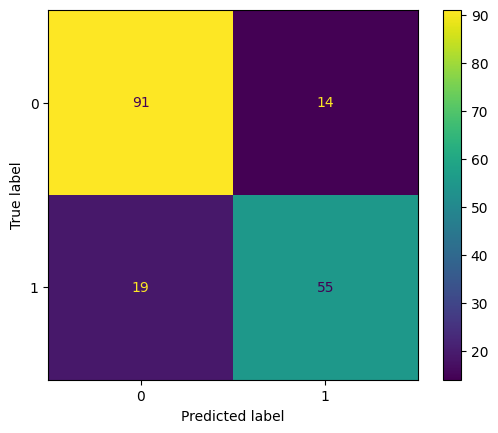

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


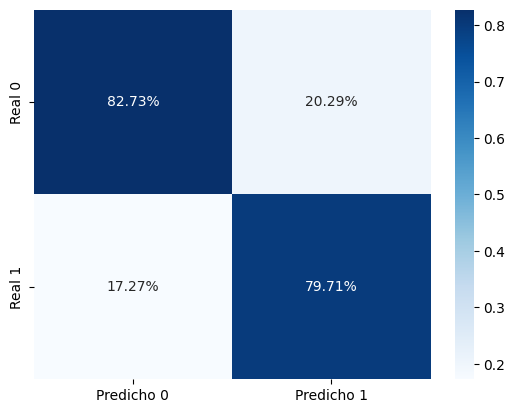

In [55]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

AUROC: 0.87


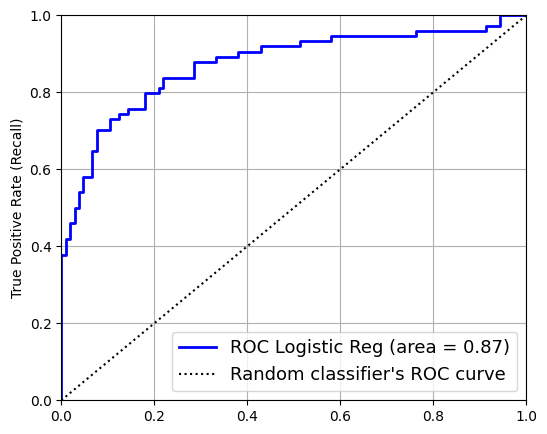

In [78]:
from sklearn.metrics import roc_curve, auc
scores = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)
print("AUROC: %.2f" %(roc_auc))
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Logistic Reg (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

In [56]:
micro_prec = precision_score(y_test, y_pred, average="micro")
print("MICRO PRECISION:", micro_prec)

macro_prec = precision_score(y_test, y_pred, average="macro")
print("MACRO PRECISION:", macro_prec)

micro_rec = recall_score(y_test, y_pred, average="micro")
print("MICRO RECALL:", micro_rec)

macro_rec = recall_score(y_test, y_pred, average="macro")
print("MACRO RECALL:", macro_rec)

micro_acc = accuracy_score(y_test, y_pred)
print("MICRO ACCURACY:", micro_acc)

MICRO PRECISION: 0.8156424581005587
MACRO PRECISION: 0.8121870882740447
MICRO RECALL: 0.8156424581005587
MACRO RECALL: 0.804954954954955
MICRO ACCURACY: 0.8156424581005587


In [57]:
acierto = accuracy_score(y_test, y_pred)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 81.56 %
Error: 18.44 %


In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [72]:
X_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who',
       'deck', 'alone'],
      dtype='object')

In [77]:
# 13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
#

# Asumiendo que estas son las columnas del modelo después del preprocesamiento
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who',
       'deck', 'alone']

# Crear un DataFrame con las características del pasajero
# Cambia 'sex', 'embarked', y otras columnas categóricas a los valores codificados usados en tu modelo.
passenger_data = pd.DataFrame({
    'pclass': [2],                   # Segunda clase
    'sex': [0],                      # Hombre                     
    'age': [35],                     # Edad media entre 30 y 40
    'sibsp': [0],                    # Viajaba solo (sin hermanos/esposo)
    'parch': [0],                    # Viajaba solo (sin padres/hijos)
    'fare': [0.0],                   # No pagó el billete
    'embarked': [2],                 # Embarcó en Southampton
    'who':[0],                       # Hombre                             
    'deck':[2.0],
    'alone': [True]                  # Viajaba solo
    
})

# Simular varias edades entre 30 y 40
probabilities = []
for age in range(30, 41):
    passenger_data['age'] = age
    prob = clf.predict_proba(passenger_data)[0, 1]  # Probabilidad de supervivencia
    probabilities.append(prob)

# Calcular la media de las probabilidades
mean_probability = np.mean(probabilities)

print(f"Probabilidad media de supervivencia: {mean_probability:.2f}")


Probabilidad media de supervivencia: 0.17


In [38]:
# 14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  
